# Trade Generator

In [1]:
import pandas as pd
import numpy as np
from portfolio_optimization.portfolio.trade_generator import *

980.0


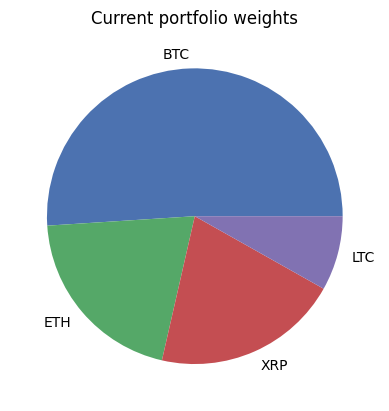

In [2]:
# Current portfolio
portfolio = pd.Series([0.05, 0.2, 400, 0.8], index=['BTC', 'ETH', 'XRP', 'LTC'])

prices = pd.Series([10000, 1000, 0.5, 100], index=['BTC', 'ETH', 'XRP', 'LTC'])

# Plot weights of the portfolio, based on the current prices
weights = portfolio * prices
weights.plot(kind='pie', title='Current portfolio weights')

print(weights.sum())

# Rebalance Simulation

In [3]:
new_target_weights = pd.Series([0.45, 0.25, 0.25, 0.05], index=['BTC', 'ETH', 'XRP', 'LTC'])

# Weight Assets is a list of tuple such that (min, ideal, max). For now, min and max are ± 10% of ideal
weight_assets = [(
    0.0,
    new_target_weights[i],
    1.0
) for i in new_target_weights.index]

from portfolio_optimization.portfolio.rebalancing import *

diff = deterministic_optimal_rebalancing(
    holdings=portfolio,
    new_target_weights=new_target_weights,
    prices=prices,
    min_W=new_target_weights * 0.9,
    max_W=new_target_weights * 1.1,
    external_movement=-100.0,
)
# Replace NaN with 0
diff = diff.fillna(0)

diff

BTC   -0.0064
ETH    0.0000
XRP    0.0000
LTC   -0.3600
dtype: float64

880.0


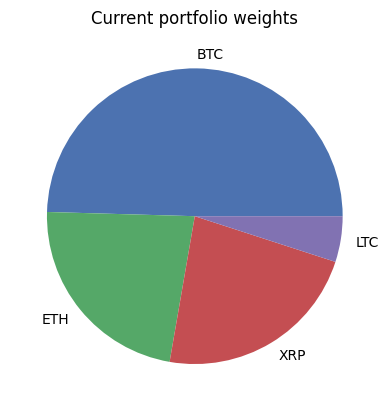

In [4]:
# Execute the trades

_portfolio = portfolio + diff

value = _portfolio * prices
value.plot(kind='pie', title='Current portfolio weights')

print(value.sum())

# Bug
As seen above, without changing the price, the rebalance simulation lost money, which should not happen. Here is a traceback of all the parameters used for the computation.

In [6]:
# Traceback
df = pd.DataFrame()

df['minMaxCurrentDifAsset'] = minMaxCurrentDifAsset(np.array(portfolio), np.array(prices), np.array(weight_assets), tbd)
df['rebalanceDelta'] = rebalanceDeltaAsset(np.array(portfolio), np.array(prices), np.array(weight_assets), tbd)
df['rebalanceDeltaTotal'] = rebalanceDeltaTotalAsset(np.array(portfolio), np.array(prices), np.array(weight_assets), tbd)
df['rebalanceMinSizeDelta'] = rebalanceMinSizeDeltaAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['rebalanceMinSizeDeltaTotal'] = rebalanceMinSizeDeltaTotalAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['buyINDAsset'] = buyINDAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['totalBuyOrder'] = totalbuyOrderAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['totalSellOrder'] = totalsellOrderAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['maxToMinRank'] = maxToMinRankAsset(np.array(portfolio), np.array(prices), np.array(weight_assets), tbd)
df['minToMaxRank'] = minToMaxRankAsset(np.array(portfolio), np.array(prices), np.array(weight_assets), tbd)
df['assetCapRank'] = assetCapRankAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['assetRawCapFilled'] = rawCapFilledAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['assetCapToFill'] = capToFillAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['minOrder'] = minOrderAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['additionalOrder'] = additionalOrdersAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['totalOrders'] = totalOrders(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['orderSizes'] = orderSize(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)


df.index = portfolio.index

df

,minMaxCurrentDifAsset,rebalanceDelta,rebalanceDeltaTotal,rebalanceMinSizeDelta,rebalanceMinSizeDeltaTotal,buyINDAsset,totalBuyOrder,totalSellOrder,maxToMinRank,minToMaxRank,assetCapRank,assetRawCapFilled,assetCapToFill,minOrder,additionalOrder,totalOrders,orderSizes
BTC,480.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,3,0,3,2460.0,0.0,0.0,0.0,0.0,0.0
ETH,780.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,2,1,2,1680.0,0.0,0.0,0.0,0.0,0.0
XRP,780.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,1,2,1,900.0,0.0,0.0,0.0,0.0,0.0
LTC,900.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0


[ 0.05        0.10575137 -0.14898982 -0.00676155]
optimal
BTC    490.000000
ETH    504.387717
XRP      0.000158
LTC      5.612124
dtype: float64
1000.0000000000001
1980.0


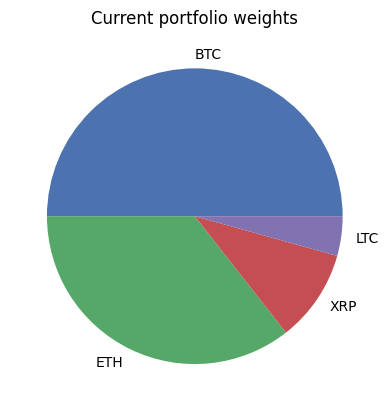

In [7]:
from portfolio_optimization.portfolio.rebalancing import *

opt = optimize_trades(
    holdings=portfolio,
    new_target_weights=new_target_weights,
    prices=prices,
    min_W=0.01,
    max_W=0.5,
    external_movement=1000,
)

print(opt * prices)
print((opt * prices).sum())

# Execute the trades

portfolio = portfolio + opt

value = portfolio * prices
value.plot(kind='pie', title='Current portfolio weights')
print(value.sum())